#  최적의 분산투자를 위한 종목 추천 모델링 ( Markowitz theory base )

![image2](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FKjNDk%2FbtqGe7eRlE2%2Fdh3lNHSWh19C3PDPFLzxN0%2Fimg.png)

In [56]:
#!pip install -U finance-datareader

In [4]:
import FinanceDataReader as fdr #주식시계열 데이터 셋
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
import datetime
import warnings
warnings.filterwarnings(action='ignore')
#plt.rcParams['font.family'] = 'AppleGothic' # mac OS
plt.rcParams['font.family'] = 'NanumGothic' # windows OS

In [58]:
df_krx = fdr.StockListing('KRX') #한국 주식 종목

In [59]:
df_krx[df_krx['Symbol'] == '005930'] # 종목코드로 검색하기

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
960,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


In [60]:
endYear = datetime.datetime.now()

In [61]:
year = '20180504' # 시작 날짜
# endYear = '20200101' # 끝 날짜

In [62]:
def codeFinder(name): # 종목이름으로 종목코드 검색하는 함수
    search=list(df_krx['Name'])
    for i in range(len(df_krx)):
        if(search[i]==name):
            return df_krx['Symbol'][i]

In [63]:
topList = ['삼성전자',
            'SK하이닉스',
            'NAVER',
            '삼성바이오로직스',
            '현대차',
            '현대모비스',
            '셀트리온',
            'LG화학',
            'POSCO',
            '삼성물산',
            '신한지주',
            'KB금융',
            'LG생활건강',
            'SK텔레콤',
            'SK',
            '기아차',
            '한국전력',
            '삼성SDI',
            '삼성에스디에스',
            '삼성생명']

In [64]:
codeList = []
for i in topList:
    codeList.append(codeFinder(i))

종목이름으로 종목코드 검색해서 리스트의 추가

In [65]:
samEle = fdr.DataReader(codeList[0],year,endYear)
skHyn = fdr.DataReader(codeList[1],year,endYear)
naver = fdr.DataReader(codeList[2],year,endYear)
samBio = fdr.DataReader(codeList[3],year,endYear)
hyunCar = fdr.DataReader(codeList[4],year,endYear)
hyunMob = fdr.DataReader(codeList[5],year,endYear)
Cell = fdr.DataReader(codeList[6],year,endYear)
LGche = fdr.DataReader(codeList[7],year,endYear)
POSCO = fdr.DataReader(codeList[8],year,endYear)
samMul = fdr.DataReader(codeList[9],year,endYear)
shin = fdr.DataReader(codeList[10],year,endYear)
KBG = fdr.DataReader(codeList[11],year,endYear)
LGlife = fdr.DataReader(codeList[12],year,endYear)
SKT = fdr.DataReader(codeList[13],year,endYear)
SK = fdr.DataReader(codeList[14],year,endYear)
KIA = fdr.DataReader(codeList[15],year,endYear)
KEPCO = fdr.DataReader(codeList[16],year,endYear)
samSDI = fdr.DataReader(codeList[17],year,endYear)
samSDS = fdr.DataReader(codeList[18],year,endYear)
samLife = fdr.DataReader(codeList[19],year,endYear)

In [66]:
tradingDaySum = len(samEle)

fdr.DataReader 를 통해 종목코드리스트를 인자로 받아 종목별 시계열 데이터생성

In [67]:
samEle.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319


In [68]:
closePrice = pd.concat([samEle.Close,
                        skHyn.Close,
                        naver.Close,
                        samBio.Close,
                        hyunCar.Close,
                        hyunMob.Close,
                        Cell.Close,
                        LGche.Close,
                        POSCO.Close,
                        samMul.Close,
                        shin.Close,
                        KBG.Close,
                        LGlife.Close,
                        SKT.Close,
                        SK.Close,
                        KIA.Close,
                        KEPCO.Close,
                        samSDI.Close,
                        samSDS.Close,
                        samLife.Close,
                        ],axis=1)

pd.concat 함수로 모든 종가데이터(Close)만 분리해서 하나로 합치기

In [69]:
closePrice.columns=topList # 칼럼이름을 위에 있던 topList로 대체

In [70]:
closePrice.head()

,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,현대차,현대모비스,셀트리온,LG화학,POSCO,삼성물산,신한지주,KB금융,LG생활건강,SK텔레콤,SK,기아차,한국전력,삼성SDI,삼성에스디에스,삼성생명
Date,,,,,,,,,,,,,,,,,,,,
2018-05-04,51900,83000,143604,359500,158000,235000,234597,341000,367500,128500,46800,59200,1304000,230500,299000,33750,37350,180500,218500,112500
2018-05-08,52600,83500,146408,370500,156000,235000,221460,330500,359000,127500,46950,58400,1293000,228000,299000,33850,36750,184000,208500,112500
2018-05-09,50900,83400,145607,398000,153500,235000,243042,339500,350500,129000,46700,58200,1331000,226000,295500,33550,35700,191000,218500,112000
2018-05-10,51600,85800,144205,389500,152000,231500,243042,340000,359500,127000,48000,58000,1309000,222500,297000,33450,35900,190500,222000,112000
2018-05-11,51300,86100,143604,386500,153000,237000,243981,345000,358000,129500,47700,58200,1313000,224500,304000,33900,35750,191000,223500,114500


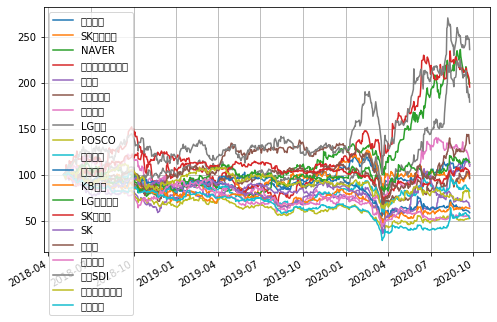

In [71]:
(closePrice / closePrice.iloc[0] * 100).plot(figsize=(8, 5), grid=True)
plt.show()

In [72]:
change = pd.concat([samEle.Change,
                    skHyn.Change,
                    naver.Change,
                    samBio.Change,
                    hyunCar.Change,
                    hyunMob.Change,
                    Cell.Change,
                    LGche.Change,
                    POSCO.Change,
                    samMul.Change,
                    shin.Change,
                    KBG.Change,
                    LGlife.Change,
                    SKT.Change,
                    SK.Change,
                    KIA.Change,
                    KEPCO.Change,
                    samSDI.Change,
                    samSDS.Change,
                    samLife.Change,
                    ],axis=1)

pd.concat 함수로 모든 수익률 데이터(Change)만 때서 하나로 합치기

In [73]:
change.columns = topList # 컬럼이름을 topList로 대체

In [74]:
chageCov = change.cov() * tradingDaySum * 100 # 공분산행렬

In [75]:
chageCov.head()

,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,현대차,현대모비스,셀트리온,LG화학,POSCO,삼성물산,신한지주,KB금융,LG생활건강,SK텔레콤,SK,기아차,한국전력,삼성SDI,삼성에스디에스,삼성생명
삼성전자,18.192561,17.783876,7.209845,7.196775,10.068921,10.529343,4.584339,11.839332,10.055746,11.590467,9.922810,10.657209,7.098167,3.400624,10.543708,8.552210,4.024157,13.134934,9.240673,9.043929
SK하이닉스,17.783876,33.161654,8.347184,6.671263,10.705792,11.117049,8.230762,13.196720,10.964359,12.068845,10.210328,11.255761,8.251368,2.906949,13.387922,9.874560,2.996709,16.852751,8.834009,9.660004
NAVER,7.209845,8.347184,30.670660,8.797864,7.358064,8.546642,8.302657,11.329908,5.154108,8.985947,4.838853,6.059284,6.578333,2.637402,11.202549,5.734090,4.741003,9.990816,8.495082,5.423307
삼성바이오로직스,7.196775,6.671263,8.797864,55.841124,9.413618,8.145042,24.130569,13.902023,5.832779,17.899108,5.405602,6.654864,8.176378,2.772424,13.019533,7.485138,5.909953,16.714791,9.645323,8.032685
현대차,10.068921,10.705792,7.358064,9.413618,32.965320,25.071587,8.360017,13.070314,12.934267,14.504933,14.039494,14.280706,6.907669,5.834782,13.592157,23.613220,7.973841,12.111105,8.930195,17.459996


In [76]:
changeCorr = change.corr()

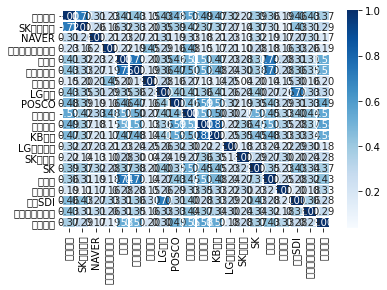

In [77]:
sns.heatmap(data=changeCorr,annot=True,fmt='.2f',linewidths=.5,cmap='Blues')

In [78]:
changeCorr.head()

,삼성전자,SK하이닉스,NAVER,삼성바이오로직스,현대차,현대모비스,셀트리온,LG화학,POSCO,삼성물산,신한지주,KB금융,LG생활건강,SK텔레콤,SK,기아차,한국전력,삼성SDI,삼성에스디에스,삼성생명
삼성전자,1.000000,0.724038,0.305223,0.225795,0.411157,0.426906,0.149367,0.425325,0.479307,0.547112,0.486501,0.469946,0.317375,0.222891,0.391293,0.359545,0.192615,0.457411,0.431629,0.371184
SK하이닉스,0.724038,1.000000,0.261734,0.155029,0.323796,0.333849,0.198631,0.351146,0.387089,0.421959,0.370781,0.367628,0.273264,0.141124,0.368002,0.307484,0.106240,0.434689,0.305628,0.293655
NAVER,0.305223,0.261734,1.000000,0.212588,0.231405,0.266878,0.208344,0.313477,0.189207,0.326682,0.182716,0.205784,0.226531,0.133136,0.320192,0.185663,0.174771,0.267957,0.305604,0.171428
삼성바이오로직스,0.225795,0.155029,0.212588,1.000000,0.219407,0.188493,0.448762,0.285063,0.158688,0.482255,0.151274,0.167500,0.208669,0.103720,0.275787,0.179616,0.161461,0.332238,0.257154,0.188175
현대차,0.411157,0.323796,0.231405,0.219407,1.000000,0.755147,0.202350,0.348817,0.457993,0.508639,0.511351,0.467813,0.229444,0.284103,0.374727,0.737478,0.283531,0.313315,0.309874,0.532346


In [79]:
changeVar = (change.var() * tradingDaySum)

In [80]:
changeVar.head() # 연평균 변동폭

삼성전자        0.181926
SK하이닉스      0.331617
NAVER       0.306707
삼성바이오로직스    0.558411
현대차         0.329653
dtype: float64

In [81]:
def riskFun(assetA, assetB):
    """
    위험률 계산공식과 기대수익률 계산공식을 0.01 ~ 1 의 가중치를 가지고 X축(위험) Y축(기대수익률)의
    그래프를 그려주고 최저위험지점과 저위험고수익지점을 빨간색과 초록색지점으로 표시하고 그 값을 반환해주는 함수입니다.
    """
    corr = changeCorr.loc[assetA , assetB]
    
    if change[assetA].mean() > 0 and change[assetB].mean() > 0: 
        # A종목과 B 종목의 수익률 평균이 양수인 것들의 조합만 출력함 (나머지 종목도 다 계산됨)
        tempList = []
        for i in np.arange(1,100,1)/100:
            r_w1 = i
            r_w2 = 1-i
            temp = (r_w1**2) * changeVar[assetA] + (r_w2**2) * changeVar[assetB] + (2 * r_w1 * r_w2 * math.sqrt(changeVar[assetA] * changeVar[assetB]) * corr )
            tempList.append(temp)
            
        changeList = []
        for i in np.arange(1,100,1)/100:
            c_w1 = i
            c_w2 = 1-i
            temp = (change[assetA].mean() * tradingDaySum) * c_w1 + (change[assetB].mean() * tradingDaySum) * c_w2
            changeList.append(temp)
            
            
        #시각화
        g = sns.regplot(x=tempList, y=changeList,fit_reg=False)
        g.set_xlabel('위험률')
        g.set_ylabel('기대수익률')
        g.set_title('{} 와 {}'.format(assetA,assetB))
        
        #각각을 데이터프레임으로 합침
        df = pd.DataFrame(tempList)
        df['a'] = changeList
        df.columns = ['위험률','기대수익률']
        df['저위험고수익'] = df['기대수익률'] / df['위험률']
        
        
        minimizeRiskPercent = df[df['위험률']==df['위험률'].min()].index.values[0]
        minimizeRisk1 = df[df['위험률']==df['위험률'].min()].위험률.values[0]
        minimizeRisk2 = df[df['위험률']==df['위험률'].min()].기대수익률.values[0]
        plt.scatter(minimizeRisk1,minimizeRisk2,marker='*',s=500,alpha=0.5,color="red")
        #최저위험 지점 빨간색 별로 표시
        
        maxChangePercent = df[df['저위험고수익']==df['저위험고수익'].max()].index.values[0]
        maxChange1 = df[df['저위험고수익']==df['저위험고수익'].max()].위험률.values[0]
        maxChange2 = df[df['저위험고수익']==df['저위험고수익'].max()].기대수익률.values[0]
        plt.scatter(maxChange1,maxChange2,marker='*',s=500,alpha=0.5,color='green')
        #저위험고수익 지점 초록색 별로 표시
        plt.show()
        
        print('{} 종목과  {} 종목을 섞었을 경우 '.format(assetA,assetB))
        
        print("리스크가 가장 낮은 포트폴리오 비중은 : {} 종목 {}% 와 {} 종목 {}% 의 비중입니다.".format(assetA,minimizeRiskPercent,assetB,100-minimizeRiskPercent))
        print("리스크 지수 : {}이고".format(round(minimizeRisk1,2)))
        print("수익률 지수 : {}입니다".format(round(minimizeRisk2,2)))
        
        print()
        
        print("리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : {} 종목 {}% 와 {} 종목 {}% 의 비중입니다.".format(assetA,maxChangePercent,assetB,100-maxChangePercent))
        print("리스크 지수 : {}이고".format(round(maxChange1,2)))
        print("수익률 지수 : {}입니다".format(round(maxChange2,2)))
        return (assetA, assetB, minimizeRisk1 , maxChange2,minimizeRiskPercent,maxChangePercent)
    

![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FXyq76%2FbtqGgwYWpT1%2FqdfqpYv6lP4gBKINKh0QnK%2Fimg.png)

![image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbzc1kN%2FbtqGishxyI1%2F3J5uac8JvAFdEehrkkmtqk%2Fimg.png)

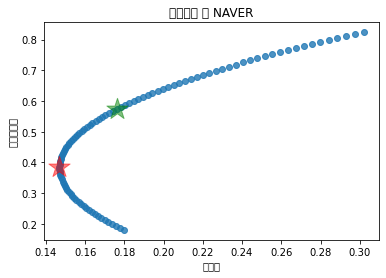

삼성전자 종목과  NAVER 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 67% 와 NAVER 종목 33% 의 비중입니다.
리스크 지수 : 0.15이고
수익률 지수 : 0.38입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 38% 와 NAVER 종목 62% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.57입니다


('삼성전자', 'NAVER', 0.14690640660154283, 0.5743350836889346, 67, 38)

In [82]:
riskFun('삼성전자','NAVER')

In [83]:
topRank = []

In [84]:
mix = [] # A 종목과 B 종목의 중복을 제거한 한 쌍의 리스트들을 추가함
for i in combinations(topList , 2):
    mix.append(i)

In [85]:
mixA = []
mixB = [] 
for i in range(len(mix)): #한 쌍의 리스트를 하나하나씩 때어넴
    mixA.append(mix[i][0])
    mixB.append(mix[i][1])

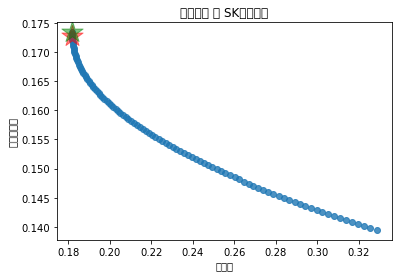

삼성전자 종목과  SK하이닉스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 96% 와 SK하이닉스 종목 4% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.17입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 98% 와 SK하이닉스 종목 2% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.17입니다


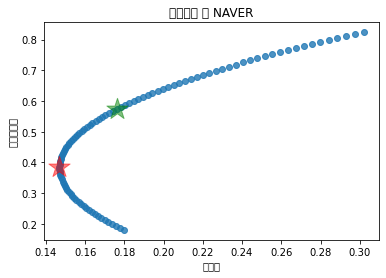

삼성전자 종목과  NAVER 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 67% 와 NAVER 종목 33% 의 비중입니다.
리스크 지수 : 0.15이고
수익률 지수 : 0.38입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 38% 와 NAVER 종목 62% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.57입니다


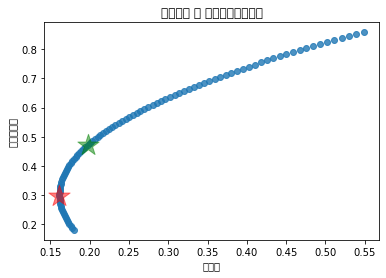

삼성전자 종목과  삼성바이오로직스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 81% 와 삼성바이오로직스 종목 19% 의 비중입니다.
리스크 지수 : 0.16이고
수익률 지수 : 0.3입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 56% 와 삼성바이오로직스 종목 44% 의 비중입니다.
리스크 지수 : 0.2이고
수익률 지수 : 0.47입니다


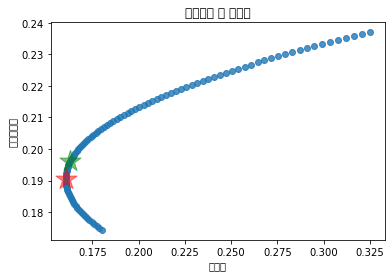

삼성전자 종목과  현대차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 73% 와 현대차 종목 27% 의 비중입니다.
리스크 지수 : 0.16이고
수익률 지수 : 0.19입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 64% 와 현대차 종목 36% 의 비중입니다.
리스크 지수 : 0.16이고
수익률 지수 : 0.2입니다


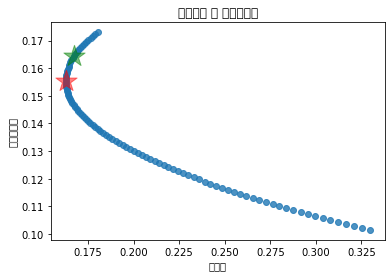

삼성전자 종목과  현대모비스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 74% 와 현대모비스 종목 26% 의 비중입니다.
리스크 지수 : 0.16이고
수익률 지수 : 0.16입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 86% 와 현대모비스 종목 14% 의 비중입니다.
리스크 지수 : 0.17이고
수익률 지수 : 0.16입니다


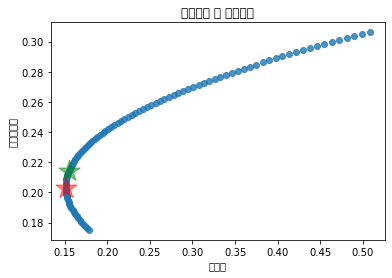

삼성전자 종목과  셀트리온 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 77% 와 셀트리온 종목 23% 의 비중입니다.
리스크 지수 : 0.15이고
수익률 지수 : 0.2입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 69% 와 셀트리온 종목 31% 의 비중입니다.
리스크 지수 : 0.15이고
수익률 지수 : 0.21입니다


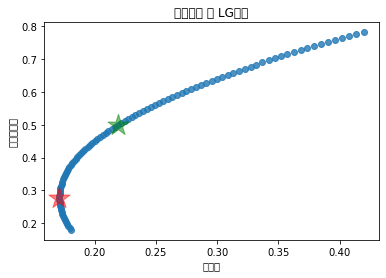

삼성전자 종목과  LG화학 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 82% 와 LG화학 종목 18% 의 비중입니다.
리스크 지수 : 0.17이고
수익률 지수 : 0.28입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 46% 와 LG화학 종목 54% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.5입니다


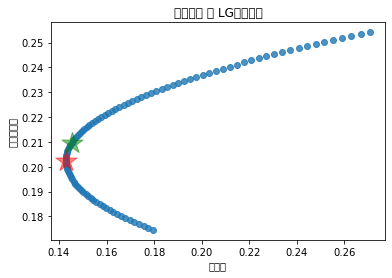

삼성전자 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 64% 와 LG생활건강 종목 36% 의 비중입니다.
리스크 지수 : 0.14이고
수익률 지수 : 0.2입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 55% 와 LG생활건강 종목 45% 의 비중입니다.
리스크 지수 : 0.15이고
수익률 지수 : 0.21입니다


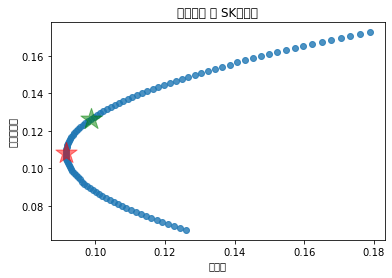

삼성전자 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 38% 와 SK텔레콤 종목 62% 의 비중입니다.
리스크 지수 : 0.09이고
수익률 지수 : 0.11입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 55% 와 SK텔레콤 종목 45% 의 비중입니다.
리스크 지수 : 0.1이고
수익률 지수 : 0.13입니다


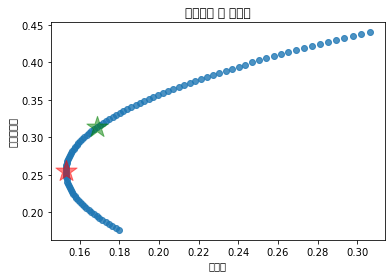

삼성전자 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 69% 와 기아차 종목 31% 의 비중입니다.
리스크 지수 : 0.15이고
수익률 지수 : 0.25입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 47% 와 기아차 종목 53% 의 비중입니다.
리스크 지수 : 0.17이고
수익률 지수 : 0.31입니다


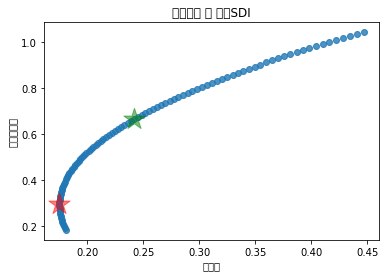

삼성전자 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성전자 종목 85% 와 삼성SDI 종목 15% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.3입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성전자 종목 43% 와 삼성SDI 종목 57% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.67입니다


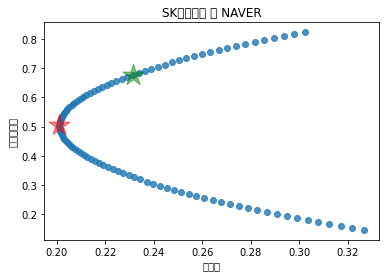

SK하이닉스 종목과  NAVER 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 46% 와 NAVER 종목 54% 의 비중입니다.
리스크 지수 : 0.2이고
수익률 지수 : 0.51입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 21% 와 NAVER 종목 79% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.68입니다


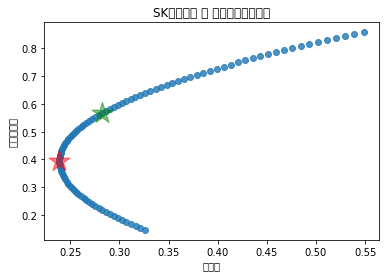

SK하이닉스 종목과  삼성바이오로직스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 64% 와 삼성바이오로직스 종목 36% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.39입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 40% 와 삼성바이오로직스 종목 60% 의 비중입니다.
리스크 지수 : 0.28이고
수익률 지수 : 0.57입니다


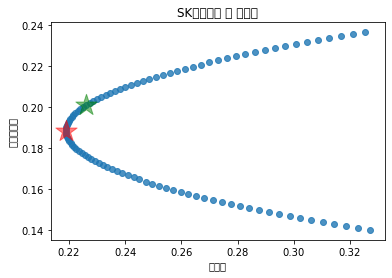

SK하이닉스 종목과  현대차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 49% 와 현대차 종목 51% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.19입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 36% 와 현대차 종목 64% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.2입니다


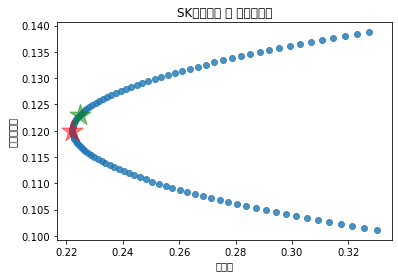

SK하이닉스 종목과  현대모비스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 49% 와 현대모비스 종목 51% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.12입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 57% 와 현대모비스 종목 43% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.12입니다


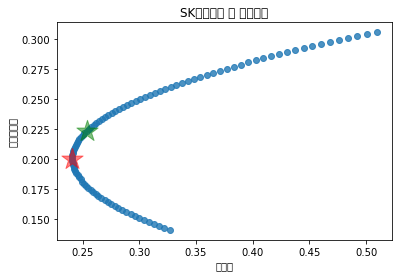

SK하이닉스 종목과  셀트리온 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 63% 와 셀트리온 종목 37% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.2입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 49% 와 셀트리온 종목 51% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.22입니다


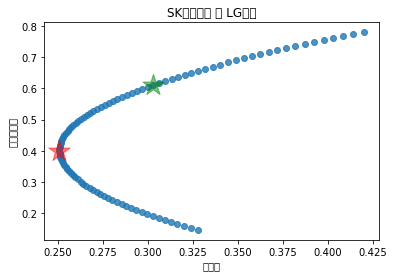

SK하이닉스 종목과  LG화학 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 59% 와 LG화학 종목 41% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.4입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 26% 와 LG화학 종목 74% 의 비중입니다.
리스크 지수 : 0.3이고
수익률 지수 : 0.61입니다


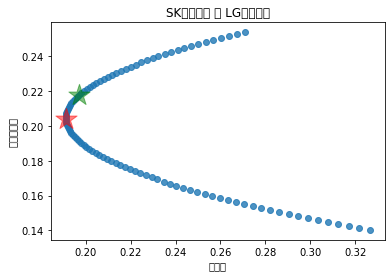

SK하이닉스 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 43% 와 LG생활건강 종목 57% 의 비중입니다.
리스크 지수 : 0.19이고
수익률 지수 : 0.2입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 31% 와 LG생활건강 종목 69% 의 비중입니다.
리스크 지수 : 0.2이고
수익률 지수 : 0.22입니다


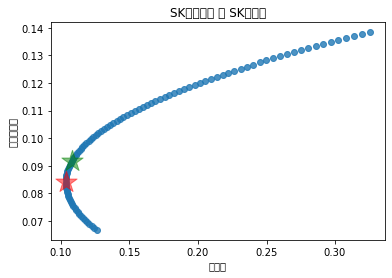

SK하이닉스 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 24% 와 SK텔레콤 종목 76% 의 비중입니다.
리스크 지수 : 0.1이고
수익률 지수 : 0.08입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 34% 와 SK텔레콤 종목 66% 의 비중입니다.
리스크 지수 : 0.11이고
수익률 지수 : 0.09입니다


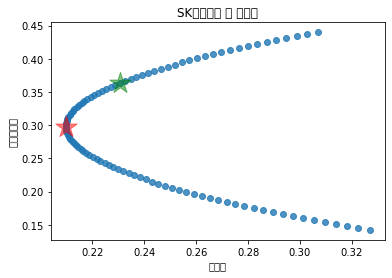

SK하이닉스 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 47% 와 기아차 종목 53% 의 비중입니다.
리스크 지수 : 0.21이고
수익률 지수 : 0.3입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 25% 와 기아차 종목 75% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.36입니다


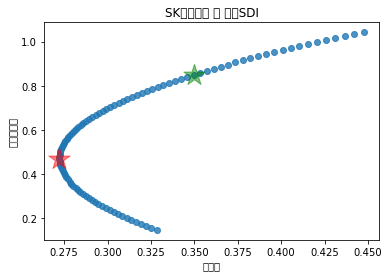

SK하이닉스 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK하이닉스 종목 63% 와 삼성SDI 종목 37% 의 비중입니다.
리스크 지수 : 0.27이고
수익률 지수 : 0.47입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK하이닉스 종목 21% 와 삼성SDI 종목 79% 의 비중입니다.
리스크 지수 : 0.35이고
수익률 지수 : 0.85입니다


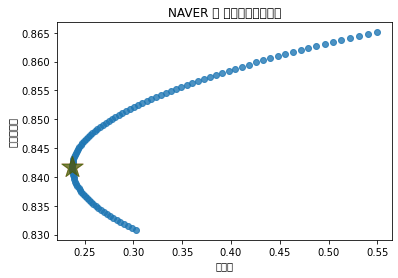

NAVER 종목과  삼성바이오로직스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 67% 와 삼성바이오로직스 종목 33% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.84입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 67% 와 삼성바이오로직스 종목 33% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.84입니다


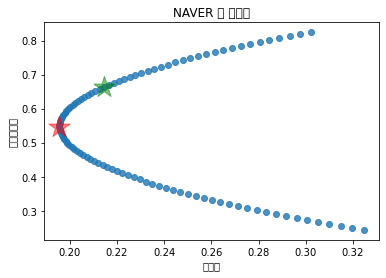

NAVER 종목과  현대차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 51% 와 현대차 종목 49% 의 비중입니다.
리스크 지수 : 0.2이고
수익률 지수 : 0.55입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 71% 와 현대차 종목 29% 의 비중입니다.
리스크 지수 : 0.21이고
수익률 지수 : 0.66입니다


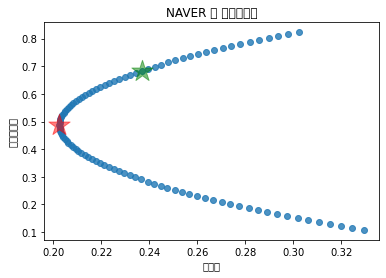

NAVER 종목과  현대모비스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 52% 와 현대모비스 종목 48% 의 비중입니다.
리스크 지수 : 0.2이고
수익률 지수 : 0.49입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 79% 와 현대모비스 종목 21% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.68입니다


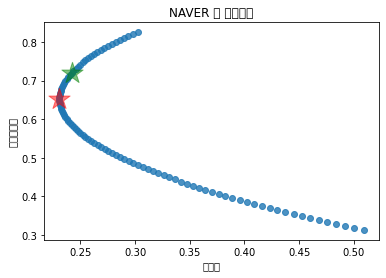

NAVER 종목과  셀트리온 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 65% 와 셀트리온 종목 35% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.65입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 78% 와 셀트리온 종목 22% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.72입니다


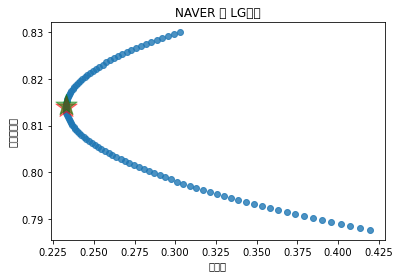

NAVER 종목과  LG화학 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 61% 와 LG화학 종목 39% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.81입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 62% 와 LG화학 종목 38% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.81입니다


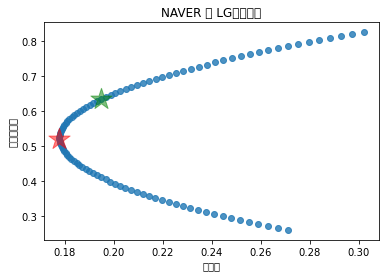

NAVER 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 45% 와 LG생활건강 종목 55% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.52입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 65% 와 LG생활건강 종목 35% 의 비중입니다.
리스크 지수 : 0.19이고
수익률 지수 : 0.63입니다


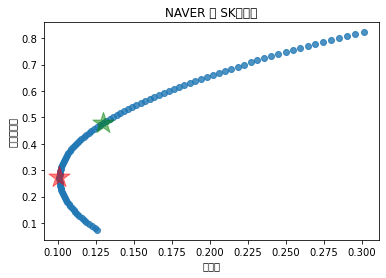

NAVER 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 26% 와 SK텔레콤 종목 74% 의 비중입니다.
리스크 지수 : 0.1이고
수익률 지수 : 0.27입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 53% 와 SK텔레콤 종목 47% 의 비중입니다.
리스크 지수 : 0.13이고
수익률 지수 : 0.48입니다


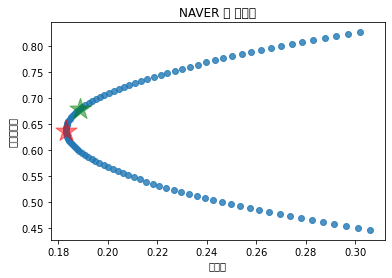

NAVER 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 49% 와 기아차 종목 51% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.64입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 60% 와 기아차 종목 40% 의 비중입니다.
리스크 지수 : 0.19이고
수익률 지수 : 0.68입니다


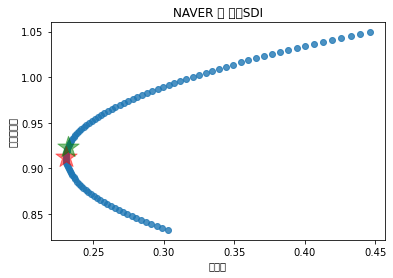

NAVER 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : NAVER 종목 62% 와 삼성SDI 종목 38% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.91입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : NAVER 종목 57% 와 삼성SDI 종목 43% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.92입니다


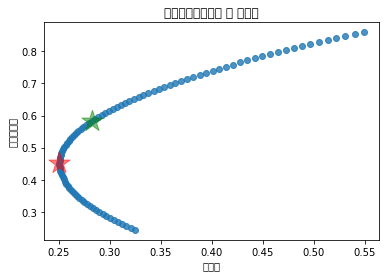

삼성바이오로직스 종목과  현대차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 33% 와 현대차 종목 67% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.45입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 54% 와 현대차 종목 46% 의 비중입니다.
리스크 지수 : 0.28이고
수익률 지수 : 0.58입니다


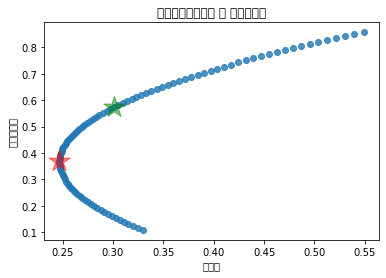

삼성바이오로직스 종목과  현대모비스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 34% 와 현대모비스 종목 66% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.37입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 61% 와 현대모비스 종목 39% 의 비중입니다.
리스크 지수 : 0.3이고
수익률 지수 : 0.57입니다


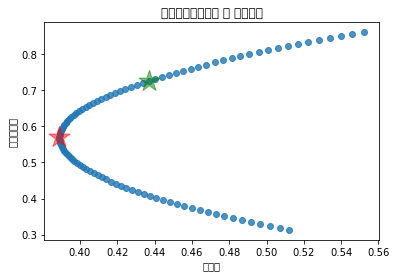

삼성바이오로직스 종목과  셀트리온 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 46% 와 셀트리온 종목 54% 의 비중입니다.
리스크 지수 : 0.39이고
수익률 지수 : 0.57입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 74% 와 셀트리온 종목 26% 의 비중입니다.
리스크 지수 : 0.44이고
수익률 지수 : 0.73입니다


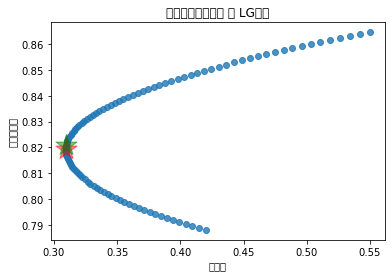

삼성바이오로직스 종목과  LG화학 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 40% 와 LG화학 종목 60% 의 비중입니다.
리스크 지수 : 0.31이고
수익률 지수 : 0.82입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 42% 와 LG화학 종목 58% 의 비중입니다.
리스크 지수 : 0.31이고
수익률 지수 : 0.82입니다


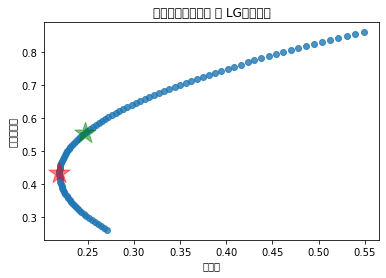

삼성바이오로직스 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 28% 와 LG생활건강 종목 72% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.43입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 48% 와 LG생활건강 종목 52% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.55입니다


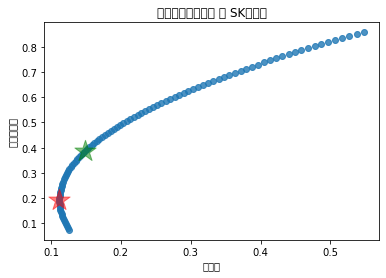

삼성바이오로직스 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 15% 와 SK텔레콤 종목 85% 의 비중입니다.
리스크 지수 : 0.11이고
수익률 지수 : 0.19입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 39% 와 SK텔레콤 종목 61% 의 비중입니다.
리스크 지수 : 0.15이고
수익률 지수 : 0.39입니다


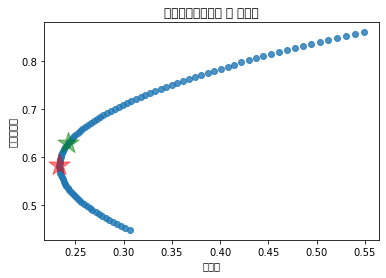

삼성바이오로직스 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 32% 와 기아차 종목 68% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.58입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 43% 와 기아차 종목 57% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.63입니다


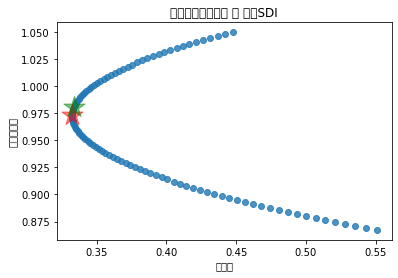

삼성바이오로직스 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 삼성바이오로직스 종목 41% 와 삼성SDI 종목 59% 의 비중입니다.
리스크 지수 : 0.33이고
수익률 지수 : 0.97입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 삼성바이오로직스 종목 37% 와 삼성SDI 종목 63% 의 비중입니다.
리스크 지수 : 0.33이고
수익률 지수 : 0.98입니다


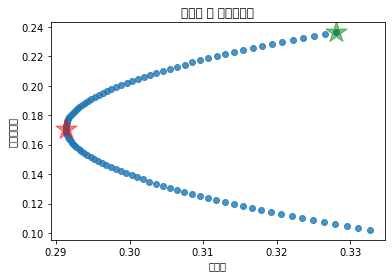

현대차 종목과  현대모비스 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대차 종목 50% 와 현대모비스 종목 50% 의 비중입니다.
리스크 지수 : 0.29이고
수익률 지수 : 0.17입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대차 종목 98% 와 현대모비스 종목 2% 의 비중입니다.
리스크 지수 : 0.33이고
수익률 지수 : 0.24입니다


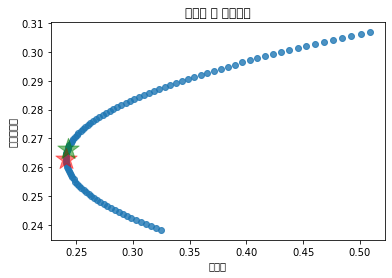

현대차 종목과  셀트리온 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대차 종목 63% 와 셀트리온 종목 37% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.26입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대차 종목 58% 와 셀트리온 종목 42% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.27입니다


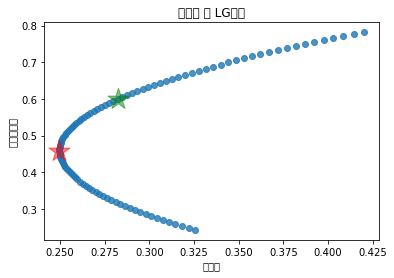

현대차 종목과  LG화학 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대차 종목 59% 와 LG화학 종목 41% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.46입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대차 종목 33% 와 LG화학 종목 67% 의 비중입니다.
리스크 지수 : 0.28이고
수익률 지수 : 0.6입니다


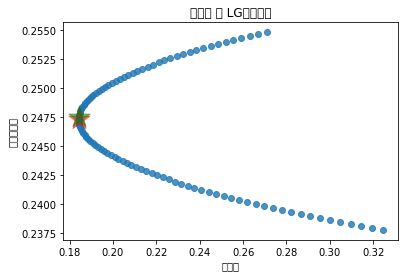

현대차 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대차 종목 43% 와 LG생활건강 종목 57% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.25입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대차 종목 42% 와 LG생활건강 종목 58% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.25입니다


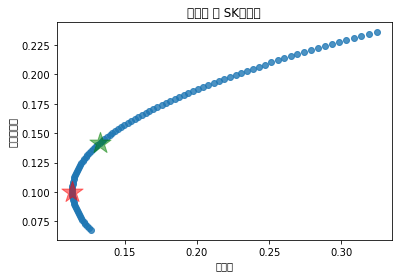

현대차 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대차 종목 19% 와 SK텔레콤 종목 81% 의 비중입니다.
리스크 지수 : 0.11이고
수익률 지수 : 0.1입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대차 종목 43% 와 SK텔레콤 종목 57% 의 비중입니다.
리스크 지수 : 0.13이고
수익률 지수 : 0.14입니다


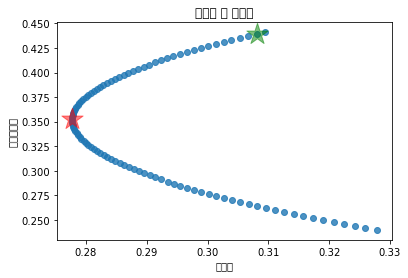

현대차 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대차 종목 43% 와 기아차 종목 57% 의 비중입니다.
리스크 지수 : 0.28이고
수익률 지수 : 0.35입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대차 종목 1% 와 기아차 종목 99% 의 비중입니다.
리스크 지수 : 0.31이고
수익률 지수 : 0.44입니다


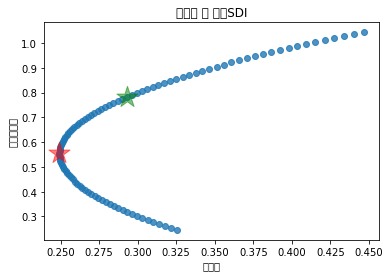

현대차 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대차 종목 60% 와 삼성SDI 종목 40% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.56입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대차 종목 32% 와 삼성SDI 종목 68% 의 비중입니다.
리스크 지수 : 0.29이고
수익률 지수 : 0.78입니다


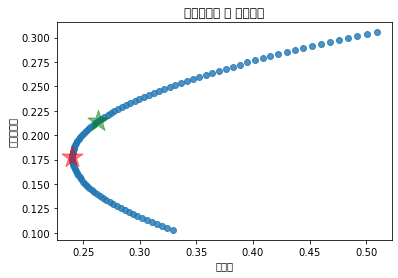

현대모비스 종목과  셀트리온 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대모비스 종목 62% 와 셀트리온 종목 38% 의 비중입니다.
리스크 지수 : 0.24이고
수익률 지수 : 0.18입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대모비스 종목 44% 와 셀트리온 종목 56% 의 비중입니다.
리스크 지수 : 0.26이고
수익률 지수 : 0.21입니다


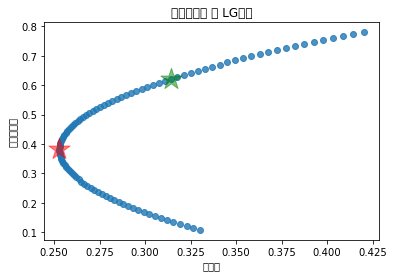

현대모비스 종목과  LG화학 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대모비스 종목 58% 와 LG화학 종목 42% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.38입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대모비스 종목 23% 와 LG화학 종목 77% 의 비중입니다.
리스크 지수 : 0.31이고
수익률 지수 : 0.62입니다


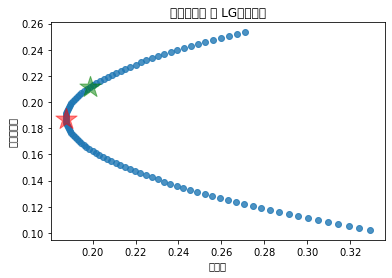

현대모비스 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대모비스 종목 43% 와 LG생활건강 종목 57% 의 비중입니다.
리스크 지수 : 0.19이고
수익률 지수 : 0.19입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대모비스 종목 27% 와 LG생활건강 종목 73% 의 비중입니다.
리스크 지수 : 0.2이고
수익률 지수 : 0.21입니다


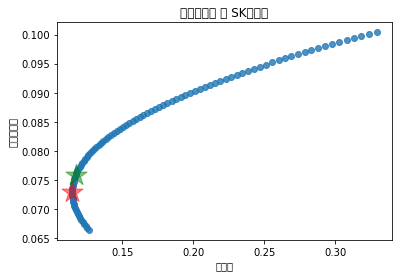

현대모비스 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대모비스 종목 19% 와 SK텔레콤 종목 81% 의 비중입니다.
리스크 지수 : 0.11이고
수익률 지수 : 0.07입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대모비스 종목 27% 와 SK텔레콤 종목 73% 의 비중입니다.
리스크 지수 : 0.12이고
수익률 지수 : 0.08입니다


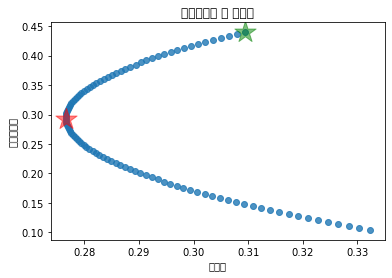

현대모비스 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대모비스 종목 43% 와 기아차 종목 57% 의 비중입니다.
리스크 지수 : 0.28이고
수익률 지수 : 0.29입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대모비스 종목 0% 와 기아차 종목 100% 의 비중입니다.
리스크 지수 : 0.31이고
수익률 지수 : 0.44입니다


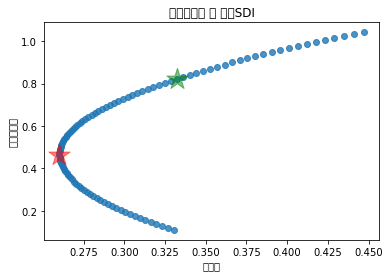

현대모비스 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 현대모비스 종목 61% 와 삼성SDI 종목 39% 의 비중입니다.
리스크 지수 : 0.26이고
수익률 지수 : 0.46입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 현대모비스 종목 23% 와 삼성SDI 종목 77% 의 비중입니다.
리스크 지수 : 0.33이고
수익률 지수 : 0.82입니다


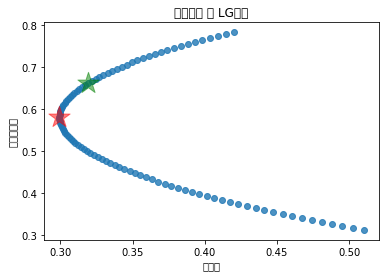

셀트리온 종목과  LG화학 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 셀트리온 종목 42% 와 LG화학 종목 58% 의 비중입니다.
리스크 지수 : 0.3이고
수익률 지수 : 0.58입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 셀트리온 종목 25% 와 LG화학 종목 75% 의 비중입니다.
리스크 지수 : 0.32이고
수익률 지수 : 0.66입니다


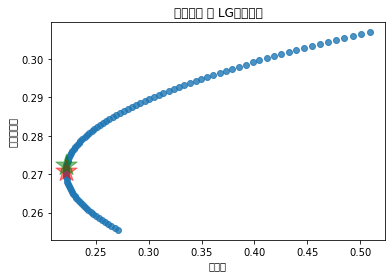

셀트리온 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 셀트리온 종목 29% 와 LG생활건강 종목 71% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.27입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 셀트리온 종목 32% 와 LG생활건강 종목 68% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.27입니다


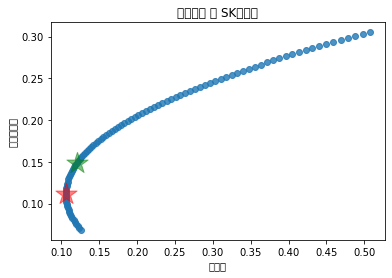

셀트리온 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 셀트리온 종목 18% 와 SK텔레콤 종목 82% 의 비중입니다.
리스크 지수 : 0.11이고
수익률 지수 : 0.11입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 셀트리온 종목 33% 와 SK텔레콤 종목 67% 의 비중입니다.
리스크 지수 : 0.12이고
수익률 지수 : 0.15입니다


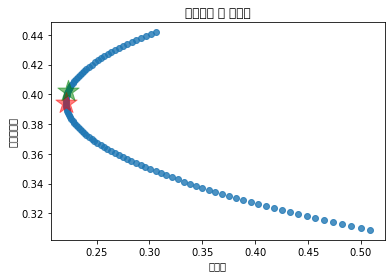

셀트리온 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 셀트리온 종목 35% 와 기아차 종목 65% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.39입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 셀트리온 종목 29% 와 기아차 종목 71% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.4입니다


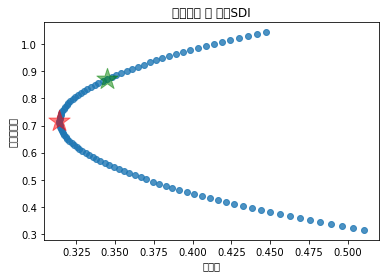

셀트리온 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 셀트리온 종목 44% 와 삼성SDI 종목 56% 의 비중입니다.
리스크 지수 : 0.31이고
수익률 지수 : 0.72입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 셀트리온 종목 23% 와 삼성SDI 종목 77% 의 비중입니다.
리스크 지수 : 0.34이고
수익률 지수 : 0.87입니다


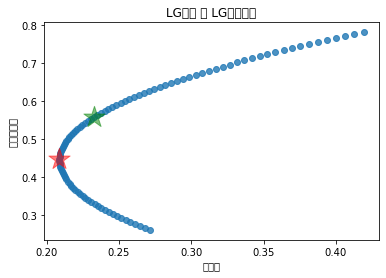

LG화학 종목과  LG생활건강 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : LG화학 종목 35% 와 LG생활건강 종목 65% 의 비중입니다.
리스크 지수 : 0.21이고
수익률 지수 : 0.45입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : LG화학 종목 56% 와 LG생활건강 종목 44% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.56입니다


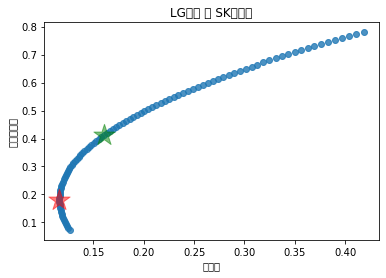

LG화학 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : LG화학 종목 15% 와 SK텔레콤 종목 85% 의 비중입니다.
리스크 지수 : 0.12이고
수익률 지수 : 0.18입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : LG화학 종목 47% 와 SK텔레콤 종목 53% 의 비중입니다.
리스크 지수 : 0.16이고
수익률 지수 : 0.41입니다


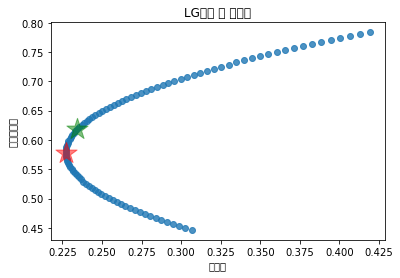

LG화학 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : LG화학 종목 38% 와 기아차 종목 62% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.58입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : LG화학 종목 50% 와 기아차 종목 50% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.62입니다


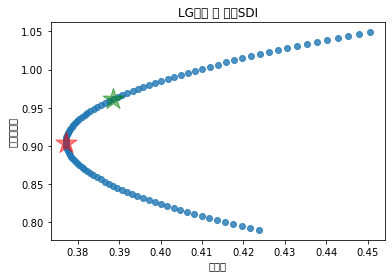

LG화학 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : LG화학 종목 55% 와 삼성SDI 종목 45% 의 비중입니다.
리스크 지수 : 0.38이고
수익률 지수 : 0.9입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : LG화학 종목 33% 와 삼성SDI 종목 67% 의 비중입니다.
리스크 지수 : 0.39이고
수익률 지수 : 0.96입니다


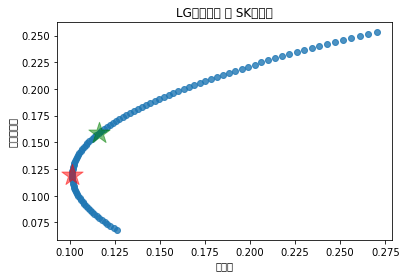

LG생활건강 종목과  SK텔레콤 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : LG생활건강 종목 27% 와 SK텔레콤 종목 73% 의 비중입니다.
리스크 지수 : 0.1이고
수익률 지수 : 0.12입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : LG생활건강 종목 48% 와 SK텔레콤 종목 52% 의 비중입니다.
리스크 지수 : 0.12이고
수익률 지수 : 0.16입니다


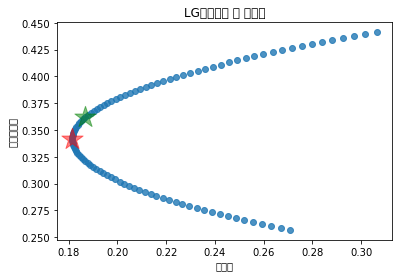

LG생활건강 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : LG생활건강 종목 53% 와 기아차 종목 47% 의 비중입니다.
리스크 지수 : 0.18이고
수익률 지수 : 0.34입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : LG생활건강 종목 42% 와 기아차 종목 58% 의 비중입니다.
리스크 지수 : 0.19이고
수익률 지수 : 0.36입니다


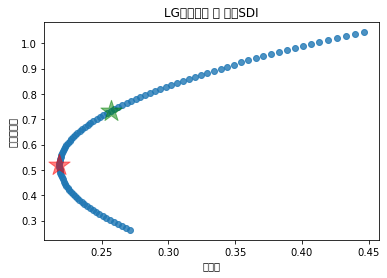

LG생활건강 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : LG생활건강 종목 66% 와 삼성SDI 종목 34% 의 비중입니다.
리스크 지수 : 0.22이고
수익률 지수 : 0.52입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : LG생활건강 종목 39% 와 삼성SDI 종목 61% 의 비중입니다.
리스크 지수 : 0.26이고
수익률 지수 : 0.73입니다


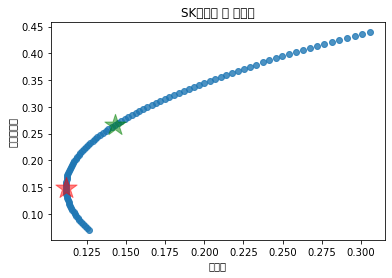

SK텔레콤 종목과  기아차 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK텔레콤 종목 77% 와 기아차 종목 23% 의 비중입니다.
리스크 지수 : 0.11이고
수익률 지수 : 0.15입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK텔레콤 종목 46% 와 기아차 종목 54% 의 비중입니다.
리스크 지수 : 0.14이고
수익률 지수 : 0.27입니다


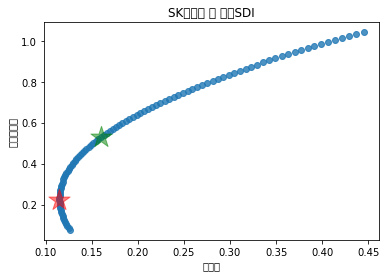

SK텔레콤 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : SK텔레콤 종목 83% 와 삼성SDI 종목 17% 의 비중입니다.
리스크 지수 : 0.11이고
수익률 지수 : 0.22입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : SK텔레콤 종목 52% 와 삼성SDI 종목 48% 의 비중입니다.
리스크 지수 : 0.16이고
수익률 지수 : 0.53입니다


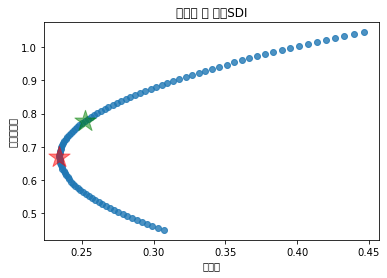

기아차 종목과  삼성SDI 종목을 섞었을 경우 
리스크가 가장 낮은 포트폴리오 비중은 : 기아차 종목 62% 와 삼성SDI 종목 38% 의 비중입니다.
리스크 지수 : 0.23이고
수익률 지수 : 0.67입니다

리스크 대비 수익률이 가장 높은 포트폴리오의 비중은 : 기아차 종목 44% 와 삼성SDI 종목 56% 의 비중입니다.
리스크 지수 : 0.25이고
수익률 지수 : 0.78입니다


In [86]:
for i in range(len(mixA)): # riskFun 함수를 통해 전체종목 조합을 돌리고 그 반환값을 topRank에 추가함.
    topRank.append(riskFun(mixA[i],mixB[i]))
    

In [87]:
topRank = list(filter(None,topRank)) # TopRank 중 수익률이 음수였던 것들(None)을 제거함

In [88]:
ranking = pd.DataFrame(topRank) # 데이터프레임 생성

In [89]:
ranking.head()

,0,1,2,3,4,5
0,삼성전자,SK하이닉스,0.181822,0.173397,96,98
1,삼성전자,NAVER,0.146906,0.574335,67,38
2,삼성전자,삼성바이오로직스,0.161664,0.471175,81,56
3,삼성전자,현대차,0.160652,0.196099,73,64
4,삼성전자,현대모비스,0.162717,0.164254,74,86


In [90]:
ranking.columns = ['종목A','종목B','최저위험','저위험고수익','최저위험 종목A 비중(%)','저위험고수익 종목A 비중(%)']

In [91]:
ranking['최저위험'] = round(ranking['최저위험'] * 100 , 2)
ranking['저위험고수익'] = round(ranking['저위험고수익'] * 100,2)

In [92]:
ranking.head()

,종목A,종목B,최저위험,저위험고수익,최저위험 종목A 비중(%),저위험고수익 종목A 비중(%)
0,삼성전자,SK하이닉스,18.18,17.34,96,98
1,삼성전자,NAVER,14.69,57.43,67,38
2,삼성전자,삼성바이오로직스,16.17,47.12,81,56
3,삼성전자,현대차,16.07,19.61,73,64
4,삼성전자,현대모비스,16.27,16.43,74,86


In [93]:
riskRanking = ranking.drop(['저위험고수익 종목A 비중(%)'],axis=1,)

In [94]:
riskRanking['최저위험 종목B 비중(%)'] = (100 - riskRanking['최저위험 종목A 비중(%)'])

In [95]:
riskRanking = riskRanking.sort_values(by='최저위험') # 최저위험 순위로 정렬

In [96]:
riskRanking.head(10)

,종목A,종목B,최저위험,저위험고수익,최저위험 종목A 비중(%),최저위험 종목B 비중(%)
8,삼성전자,SK텔레콤,9.15,12.63,38,62
27,NAVER,SK텔레콤,10.09,47.88,26,74
60,LG생활건강,SK텔레콤,10.14,15.86,27,73
18,SK하이닉스,SK텔레콤,10.36,9.16,24,76
53,셀트리온,SK텔레콤,10.58,14.81,18,82
63,SK텔레콤,기아차,11.16,26.59,77,23
35,삼성바이오로직스,SK텔레콤,11.20,38.58,15,85
42,현대차,SK텔레콤,11.37,14.15,19,81
48,현대모비스,SK텔레콤,11.48,7.58,19,81
64,SK텔레콤,삼성SDI,11.49,52.92,83,17


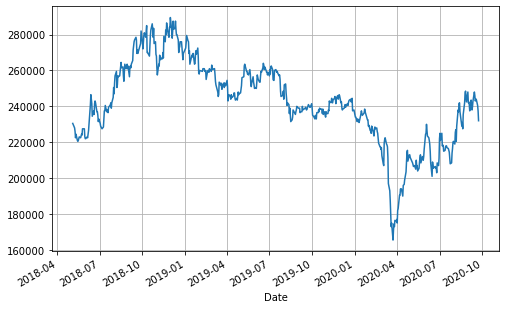

In [97]:
closePrice.SK텔레콤.plot(figsize=(8, 5), grid=True)
plt.show()

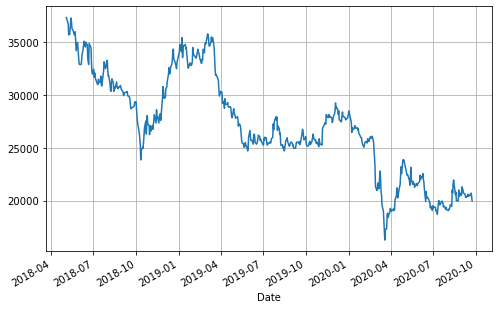

In [98]:
closePrice.한국전력.plot(figsize=(8, 5), grid=True)
plt.show()

In [99]:
changeRanking = ranking.drop(['최저위험 종목A 비중(%)'],axis=1)

In [100]:
changeRanking['저위험고시익 종목B 비중(%)'] = (100 - changeRanking['저위험고수익 종목A 비중(%)'])

In [101]:
changeRanking = changeRanking.sort_values(by='저위험고수익',ascending=False) # 저위험고수익으로 정렬

In [102]:
changeRanking.head(10)

,종목A,종목B,최저위험,저위험고수익,저위험고수익 종목A 비중(%),저위험고시익 종목B 비중(%)
37,삼성바이오로직스,삼성SDI,33.24,98.08,37,63
59,LG화학,삼성SDI,37.72,96.17,33,67
29,NAVER,삼성SDI,23.04,92.33,57,43
55,셀트리온,삼성SDI,31.41,87.30,23,77
20,SK하이닉스,삼성SDI,27.22,85.08,21,79
21,NAVER,삼성바이오로직스,23.73,84.16,67,33
50,현대모비스,삼성SDI,26.01,82.33,23,77
33,삼성바이오로직스,LG화학,30.94,82.08,42,58
25,NAVER,LG화학,23.28,81.45,62,38
44,현대차,삼성SDI,24.92,78.29,32,68


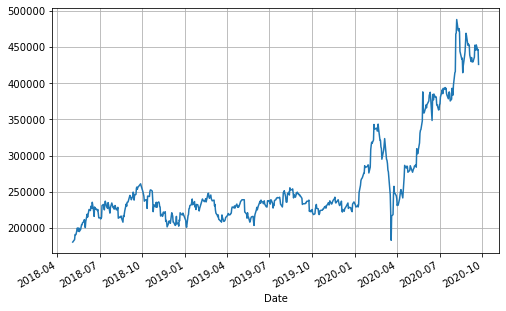

In [103]:
closePrice.삼성SDI.plot(figsize=(8, 5), grid=True)
plt.show()

# Keras를 활용한 주가 예측 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import scipy as sp
from scipy import stats # statistics
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs #random 한 데이터 묶음을 만들어 줌.
from sklearn.model_selection import train_test_split
from sklearn import datasets, preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM
import datetime

#### RNN의 LSTM을 사용하려는 이유는 주가 데이터가 순서가 있는 시계열(Time-series) 데이터이기 때문입니다.

In [2]:
simbol = '041140' # NEXON
startDate = '20021029' # 시작날짜
nowDate = datetime.datetime.now()

In [5]:
#데이터 전처리
df_KOSPI_price_naver = fdr.DataReader(simbol, startDate,nowDate)
df_KOSPI_price_naver = df_KOSPI_price_naver.reset_index() # 인덱스( Date 위로 올리기)
df_KOSPI_price_naver.rename(columns = {'Date':'일자','Open':'시가','High':'고가','Low':'저가','Close':'종가','Volume':'거래량','Change':'수익률'}, inplace=True)
df_KOSPI_price_naver = df_KOSPI_price_naver.dropna(axis=0) # 결측치제거
df_KOSPI_price_naver

,일자,시가,고가,저가,종가,거래량,수익률
0,2002-10-29,343725,346370,333229,346347,62856,0.023257
1,2002-10-30,348982,364739,346362,354218,74701,0.022726
2,2002-10-31,359478,359478,333251,354218,95602,0.000000
3,2002-11-01,354206,393575,341095,393575,139246,0.111110
4,2002-11-04,396225,406721,383084,385704,31672,-0.019999
...,...,...,...,...,...,...,...
4494,2020-12-29,12400,12800,12400,12700,129622,0.016000
4495,2020-12-30,12700,13200,12700,13200,224307,0.039370
4496,2021-01-04,13200,13200,12850,12950,194010,-0.018939
4497,2021-01-05,12950,14700,12750,13600,1498033,0.050193


2002 년 10월 30일 부터 오늘까지 주식장이 열린 날이 4399일이다.

In [6]:
closeMin = df_KOSPI_price_naver['종가'].min()

In [7]:
closeMax = df_KOSPI_price_naver['종가'].max()

정규화를 하기전에 종가의 최소값과 최대값을 미리 저장해둔다. 추 후 정규화된 값을 다시 복구하기 위함.

In [8]:
# df_KOSPI_price_naver 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량','수익률']
df_KOSPI_price_naver_scaled = scaler.fit_transform(df_KOSPI_price_naver[scale_cols])

df_KOSPI_price_naver_scaled = pd.DataFrame(df_KOSPI_price_naver_scaled)
df_KOSPI_price_naver_scaled.columns = scale_cols
df_KOSPI_price_naver_scaled.head()

,시가,고가,저가,종가,거래량,수익률
0,0.678734,0.660047,0.693983,0.681935,0.000705,0.496539
1,0.689114,0.695051,0.721334,0.697576,0.000838,0.495572
2,0.709840,0.685025,0.694029,0.697576,0.001072,0.454213
3,0.699430,0.750001,0.710364,0.775788,0.001562,0.656422
4,0.782402,0.775052,0.797811,0.760146,0.000355,0.417817


정규화를 하는 이유는 딥러닝의 예측을 더 쉽고 정확하게 하기 위해서

In [9]:
# Train, Test set 분리

TEST_SIZE = 200 

train = df_KOSPI_price_naver_scaled[:-TEST_SIZE] # 마지막 200개 데이터 이전 것
test = df_KOSPI_price_naver_scaled[-TEST_SIZE:] # 마지막 200개 데이터

In [10]:
# window_size 는 모델링이후에 예측할때 한 묶음당 갯 수

def make_dataset(data, label, window_size = 20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [11]:
feature_cols = ['시가', '고가', '저가', '거래량','수익률']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.3)

x_train.shape, x_valid.shape

((2995, 20, 5), (1284, 20, 5))

In [12]:
# test dataset 생성

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 5), (180, 1))

In [13]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = 'checkpoint-epoch-batch-trial-001.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
188/188 [==============================] - 3s 7ms/step - loss: 0.0458 - val_loss: 0.0032

Epoch 00001: val_loss improved from inf to 0.00317, saving model to checkpoint-epoch-batch-trial-001.h5
Epoch 2/200
188/188 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0011

Epoch 00002: val_loss improved from 0.00317 to 0.00110, saving model to checkpoint-epoch-batch-trial-001.h5
Epoch 3/200
188/188 [==============================] - 1s 5ms/step - loss: 9.1781e-04 - val_loss: 6.9191e-04

Epoch 00003: val_loss improved from 0.00110 to 0.00069, saving model to checkpoint-epoch-batch-trial-001.h5
Epoch 4/200
188/188 [==============================] - 1s 6ms/step - loss: 5.4548e-04 - val_loss: 4.1869e-04

Epoch 00004: val_loss improved from 0.00069 to 0.00042, saving model to checkpoint-epoch-batch-trial-001.h5
Epoch 5/200
188/188 [==============================] - 1s 5ms/step - loss: 4.1891e-04 - val_loss: 2.4962e-04

Epoch 00005: val_loss improved from 0.

In [15]:
model.load_weights(filename)

In [16]:
pred = model.predict(test_feature)

In [17]:
predY = (closeMax - closeMin) * pred + closeMin

In [18]:
testY = df_KOSPI_price_naver['종가'][-180:].values

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


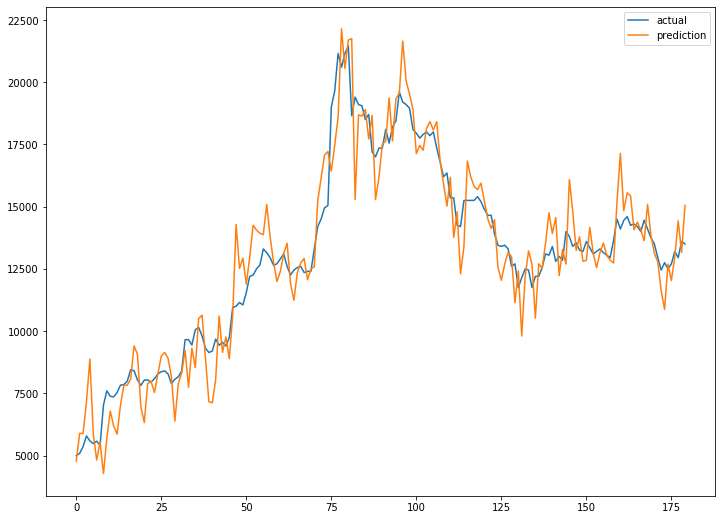

In [19]:
plt.figure(figsize=(12, 9))
plt.plot(testY, label='actual')
plt.plot(predY, label='prediction')
plt.legend()
plt.show()

# 다 필요없고 그래서 내일 종가 얼만데?

In [20]:
naverClosePrice = predY[-1][0]

In [21]:
naverClosePrice

15049.485962372273

In [22]:
Message=('오늘의 넥슨 예측 종가는 {}원 입니다.'.format(round(naverClosePrice)))
Message=str(Message)
print(Message)

오늘의 넥슨 예측 종가는 15049원 입니다.


In [79]:
import smtplib
from email.mime.text import MIMEText

def sendMail(sender, receiver, msg):
    smtp = smtplib.SMTP_SSL('smtp.gmail.com', 465) #메일 제공사마다 다름.
    smtp.login('kimamugae6jo@gmail.com', 'ihvqaddkjnoatjxk') # 지메일 "앱 비밀번호" 를 입력해주세요. 개인 메일 계정
    msg = MIMEText(Message)
    msg['Subject'] = '오늘의 예측 종가를 알려드립니다' #메일의 제목
    smtp.sendmail('kimamugae6jo@gmail.com', receiver, msg.as_string())
    smtp.quit()

In [80]:
sendMail('kimamugae6jo@gmail.com', 'alswhddh3@gmail.com', Message)

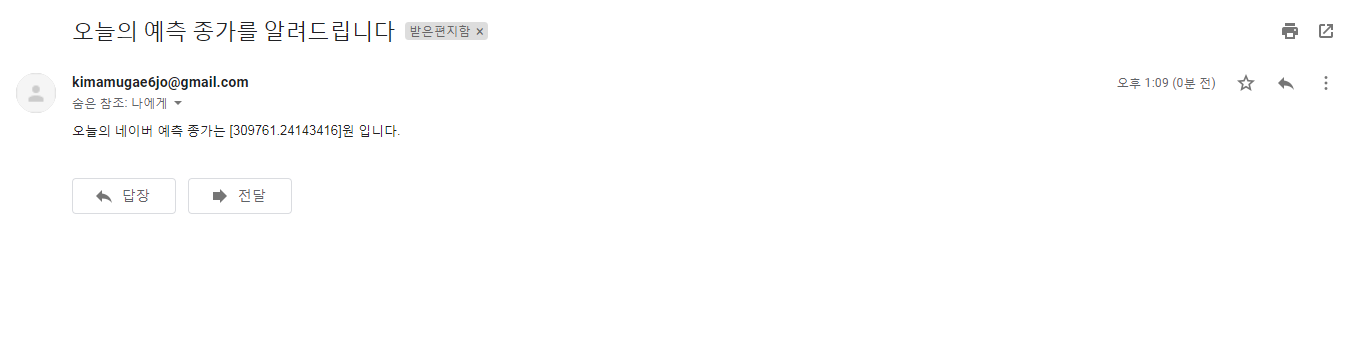

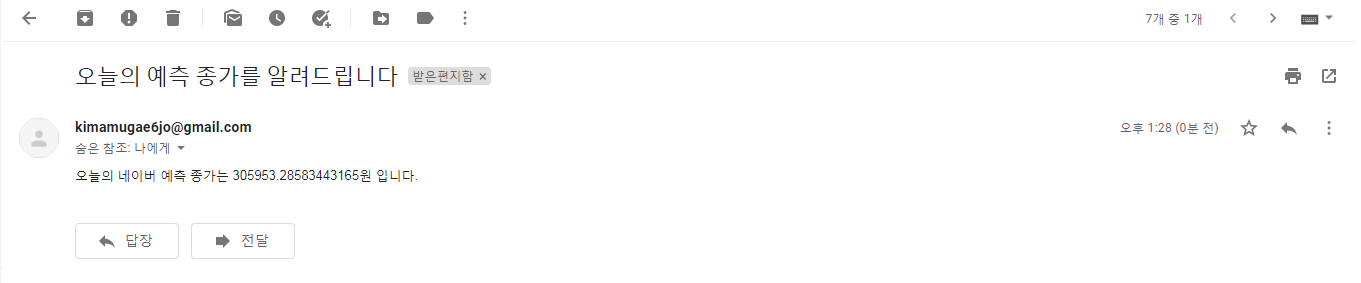